# Differential Phase Contrast

In [1]:
# all the imports
import os
import tempfile
from subprocess import call
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pims import ImageSequence
import zipfile
from skbeam.core import dpc
%matplotlib notebook

dpc.logger.setLevel(dpc.logging.DEBUG)

In [2]:
# some helper functions
def load_image(filename):
    """
    Load an image

    Parameters
    ----------
    filename : string
        the location and name of an image

    Return
    ----------
    t : 2-D numpy array
        store the image data

    """

    if os.path.exists(filename):
        t = plt.imread(filename)

    else:
        print('Please download and decompress the test data to your home directory\n\
               Dropbox link, https://www.dropbox.com/s/ntvk7866h23jdpr/SOFC.zip?dl=0')
        raise Exception('File not found: %s' % filename)

    return t

In [3]:
import download
download.run()

current_folder = /home/edill/dev/python/scikit-beam-examples/demos/dpc
/home/edill/dev/python/scikit-beam-examples/demos/dpc/SOFC does not exist


In [4]:
# Set parameters
start_point = [1, 0]
first_image = 1
pixel_size = (55, 55)
focus_to_det = 1.46e6
scan_xstep = 0.1
scan_ystep = 0.1
scan_rows = 121
scan_cols = 121
energy = 19.5
roi = None
padding = 0
weighting = 1.
bad_pixels = None
solver = 'Nelder-Mead'
images = ImageSequence(os.path.join('SOFC', '*.tif'))
img_size = images[0].shape
ref_image = np.ones(img_size)
scale = True
negate = True

In [5]:
# Use skbeam.dpc.dpc_runner
phase, amplitude = dpc.dpc_runner(
    ref_image, images, start_point, pixel_size, focus_to_det, scan_rows,
    scan_cols, scan_xstep, scan_ystep, energy, padding, weighting, solver,
    roi, bad_pixels, negate, scale)

DEBUG:skbeam.core.dpc:dpc 0% complete
DEBUG:skbeam.core.dpc:dpc 1% complete
DEBUG:skbeam.core.dpc:dpc 2% complete
DEBUG:skbeam.core.dpc:dpc 3% complete
DEBUG:skbeam.core.dpc:dpc 4% complete
DEBUG:skbeam.core.dpc:dpc 5% complete
DEBUG:skbeam.core.dpc:dpc 6% complete
DEBUG:skbeam.core.dpc:dpc 7% complete
DEBUG:skbeam.core.dpc:dpc 8% complete
DEBUG:skbeam.core.dpc:dpc 9% complete
DEBUG:skbeam.core.dpc:dpc 10% complete
DEBUG:skbeam.core.dpc:dpc 11% complete
DEBUG:skbeam.core.dpc:dpc 12% complete
DEBUG:skbeam.core.dpc:dpc 13% complete
DEBUG:skbeam.core.dpc:dpc 14% complete
DEBUG:skbeam.core.dpc:dpc 15% complete
DEBUG:skbeam.core.dpc:dpc 16% complete
DEBUG:skbeam.core.dpc:dpc 17% complete
DEBUG:skbeam.core.dpc:dpc 18% complete
DEBUG:skbeam.core.dpc:dpc 19% complete
DEBUG:skbeam.core.dpc:dpc 20% complete
DEBUG:skbeam.core.dpc:dpc 21% complete
DEBUG:skbeam.core.dpc:dpc 22% complete
DEBUG:skbeam.core.dpc:dpc 23% complete
DEBUG:skbeam.core.dpc:dpc 24% complete
DEBUG:skbeam.core.dpc:dpc 25% compl

<IPython.core.display.Javascript object>


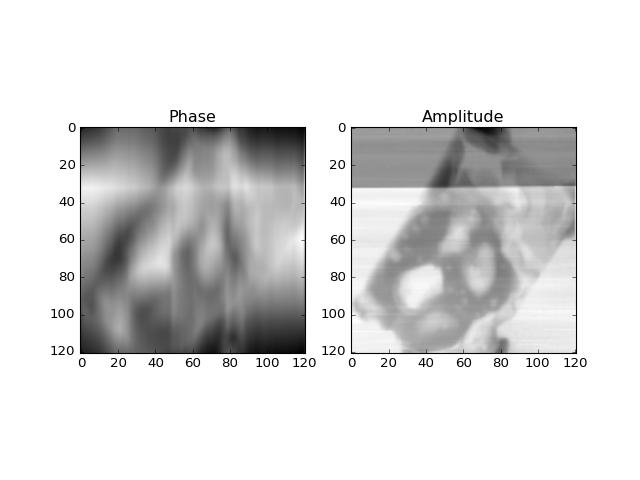

In [6]:
# display results
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(phase, cmap='gray')
ax[1].imshow(amplitude, cmap='gray')
ax[0].set_title('Phase')
ax[1].set_title('Amplitude')

In [7]:
import skbeam


In [8]:
skbeam.__version__

'0.0.6+41.g8aa4712'